In [2]:
from qiskit import *
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter, complete_meas_cal
from qiskit.visualization import plot_histogram, circuit_drawer

C:\Users\HP\AppData\Local\Temp\ipykernel_5220\1156107664.py:2: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import CompleteMeasFitter, complete_meas_cal


In [3]:
qc = QuantumCircuit(4, 4)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)
qc.measure(range(4), range(4))

In [4]:
backend = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, backend)

In [5]:
job = backend.run(transpiled_qc, shots=1024)
result = job.result()
counts = result.get_counts()

In [6]:
print(f'Counts :{counts}')

Counts :{'1111': 522, '0000': 502}


In [8]:
cal_circuits, state_labels = complete_meas_cal(qubit_list=range(4))
cal_job = backend.run(cal_circuits, backend=backend)
cal_results = cal_job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
mitigated_count = meas_fitter.filter.apply(counts)

In [9]:
print (f'Original Counts:{counts} \nMitigated Counts:{mitigated_count}')

Original Counts:{'1111': 522, '0000': 502} 
Mitigated Counts:{'0000': 502.00000001281325, '0001': 2.2238302493236186e-16, '0010': 2.2238302493236186e-16, '0100': 2.2238302493236186e-16, '0110': 2.2238302493236186e-16, '1111': 521.9999999889744}


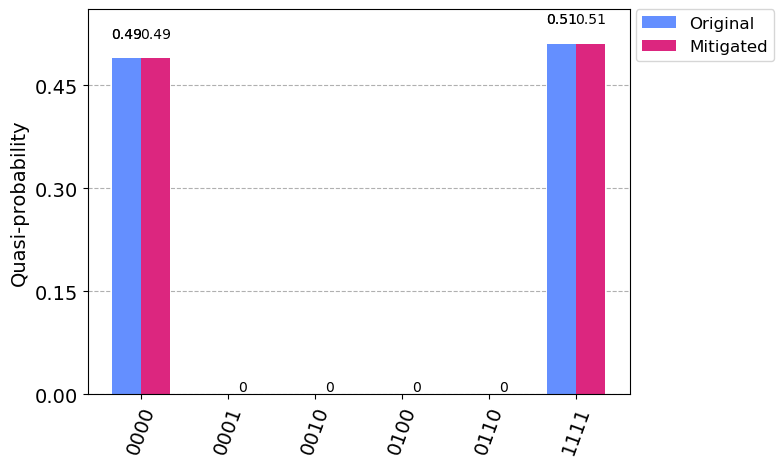

In [10]:
plot_histogram([counts, mitigated_count], legend = ['Original', 'Mitigated'])